In [1]:
import pandas as pd
import numpy as np
import requests

In [2]:
df=pd.DataFrame()

for year in range(19,9,-1):
    #read the excel 
    sheet_name='Graddagstall '+ str(year)
    temp_df = pd.read_excel('09605793F593480EA9AE66850DA24B7F.xlsx',sheet_name=sheet_name, header=4)
    
    #fix columns name 
    columns = list(temp_df.columns)
    columns[1]='label'
    columns[2]='kommune'
    temp_df.columns = columns
    
    #seleting only the rows with data for the kommune

    temp_df = temp_df[temp_df['label']=='komm']
    df = pd.concat([df,temp_df])

In [3]:
df.columns

Index(['År', 'label', 'kommune', 'h o.h.', 'år', 'jan', 'feb', 'mar', 'apr',
       'mai', 'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des', 'sum',
       'Unnamed: 18', 'N61-90', 'N71-00', 'N81-10', '%61-90', '%71-00',
       '%81-10'],
      dtype='object')

In [4]:
df.shape

(4312, 25)

In [5]:
df = df[['kommune','år','jan', 'feb', 'mar', 'apr', 'mai',
       'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des']]

In [6]:
df.dropna(axis=0,inplace=True)

In [7]:
for index_to_remove in df[df['jan']=='-'].index:
    try :
        df = df.drop(index = index_to_remove)
    except:
        pass

In [8]:
for column in ['jan', 'feb', 'mar', 'apr', 'mai','jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des']:
    df.astype({column: int}, errors='raise') 

In [9]:
df.describe()

,kommune,år,jan,feb,mar,apr,mai,jun,jul,aug,sep,okt,nov,des
count,4296,4296,4296,4296,4296,4296,4296,4296,4296,4296,4296,4296,4296,4296
unique,429,10,582,526,478,370,398,337,265,277,305,386,489,617
top,Våler,2016,639,549,456,353,232,88,1,85,156,339,425,514
freq,20,431,22,27,30,44,40,39,50,59,41,30,30,23


In [10]:
pivot =  df.pivot_table(index='kommune',aggfunc='mean',values=['jan','feb', 'mar', 'apr', 'mai',
       'jun', 'jul', 'aug', 'sep', 'okt', 'nov', 'des'])

In [11]:
pivot

,apr,aug,des,feb,jan,jul,jun,mai,mar,nov,okt,sep
kommune,,,,,,,,,,,,
Agdenes,364.1,97.8,514.400000,484.800000,565.600000,92.400000,160.900000,244.6,480.700000,435.600000,323.400000,172.9
Alstahaug,381.4,111.2,492.100000,488.900000,553.000000,107.900000,182.700000,269.0,500.700000,415.700000,326.800000,180.2
Alta,491.1,166.9,659.400000,683.200000,769.500000,127.400000,230.300000,346.8,653.800000,575.700000,451.900000,250.4
Alvdal,461.1,164.4,774.800000,696.500000,866.200000,105.700000,180.500000,305.0,636.600000,636.600000,474.900000,275.1
Andebu,330.0,56.0,561.857143,540.428571,638.857143,28.857143,82.142857,195.0,469.857143,437.714286,307.857143,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Østre Toten,380.3,81.5,648.300000,615.000000,730.200000,44.300000,98.600000,216.7,551.100000,506.600000,373.000000,186.8
Øvre Eiker,321.1,48.6,610.400000,557.200000,669.600000,19.800000,59.700000,169.1,485.000000,471.400000,332.100000,145.2
Øyer,386.1,94.8,711.800000,650.600000,800.900000,49.200000,102.900000,225.4,569.900000,560.200000,404.900000,206.4


In [12]:
pivot.T.columns

Index(['Agdenes', 'Alstahaug', 'Alta', 'Alvdal', 'Andebu', 'Andøy', 'Aremark',
       'Arendal', 'Asker', 'Askim',
       ...
       'Åsnes', 'Øksnes', 'Ørland', 'Ørskog', 'Ørsta', 'Østre Toten',
       'Øvre Eiker', 'Øyer', 'Øygarden', 'Øystre Slidre'],
      dtype='object', name='kommune', length=429)

<AxesSubplot:>

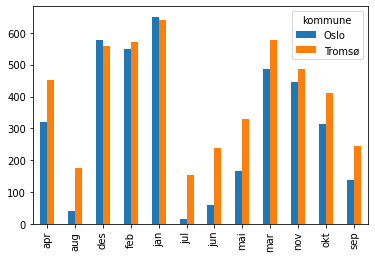

In [13]:
pivot.T[['Oslo','Tromsø']].plot.bar()

In [14]:
pivot

,apr,aug,des,feb,jan,jul,jun,mai,mar,nov,okt,sep
kommune,,,,,,,,,,,,
Agdenes,364.1,97.8,514.400000,484.800000,565.600000,92.400000,160.900000,244.6,480.700000,435.600000,323.400000,172.9
Alstahaug,381.4,111.2,492.100000,488.900000,553.000000,107.900000,182.700000,269.0,500.700000,415.700000,326.800000,180.2
Alta,491.1,166.9,659.400000,683.200000,769.500000,127.400000,230.300000,346.8,653.800000,575.700000,451.900000,250.4
Alvdal,461.1,164.4,774.800000,696.500000,866.200000,105.700000,180.500000,305.0,636.600000,636.600000,474.900000,275.1
Andebu,330.0,56.0,561.857143,540.428571,638.857143,28.857143,82.142857,195.0,469.857143,437.714286,307.857143,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Østre Toten,380.3,81.5,648.300000,615.000000,730.200000,44.300000,98.600000,216.7,551.100000,506.600000,373.000000,186.8
Øvre Eiker,321.1,48.6,610.400000,557.200000,669.600000,19.800000,59.700000,169.1,485.000000,471.400000,332.100000,145.2
Øyer,386.1,94.8,711.800000,650.600000,800.900000,49.200000,102.900000,225.4,569.900000,560.200000,404.900000,206.4


## graddetall by seasons

In [15]:
pivot.head()

,apr,aug,des,feb,jan,jul,jun,mai,mar,nov,okt,sep
kommune,,,,,,,,,,,,
Agdenes,364.1,97.8,514.400000,484.800000,565.600000,92.400000,160.900000,244.6,480.700000,435.600000,323.400000,172.9
Alstahaug,381.4,111.2,492.100000,488.900000,553.000000,107.900000,182.700000,269.0,500.700000,415.700000,326.800000,180.2
Alta,491.1,166.9,659.400000,683.200000,769.500000,127.400000,230.300000,346.8,653.800000,575.700000,451.900000,250.4
Alvdal,461.1,164.4,774.800000,696.500000,866.200000,105.700000,180.500000,305.0,636.600000,636.600000,474.900000,275.1
Andebu,330.0,56.0,561.857143,540.428571,638.857143,28.857143,82.142857,195.0,469.857143,437.714286,307.857143,143.0


In [16]:
import numpy as np

In [17]:
pivot['Winter'] = np.sum( pivot[['jan','feb','mar']] , axis = 1)
pivot['Spring'] = np.sum( pivot[['apr','mai','jun']] , axis = 1)
pivot['Sommer'] = np.sum( pivot[['jul','aug','sep']] , axis = 1)
pivot['Autumn']  = np.sum( pivot[['okt','nov','des']] , axis = 1)

In [18]:
final_df = pivot[['Winter','Spring','Sommer','Autumn']]

<AxesSubplot:>

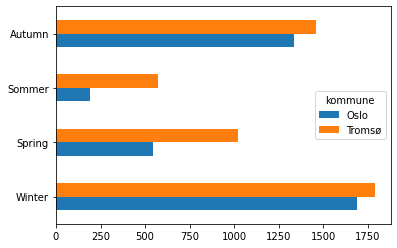

In [19]:
final_df.T[['Oslo','Tromsø']].plot.barh()

In [20]:
final_df.T.columns

Index(['Agdenes', 'Alstahaug', 'Alta', 'Alvdal', 'Andebu', 'Andøy', 'Aremark',
       'Arendal', 'Asker', 'Askim',
       ...
       'Åsnes', 'Øksnes', 'Ørland', 'Ørskog', 'Ørsta', 'Østre Toten',
       'Øvre Eiker', 'Øyer', 'Øygarden', 'Øystre Slidre'],
      dtype='object', name='kommune', length=429)

<AxesSubplot:xlabel='kommune'>

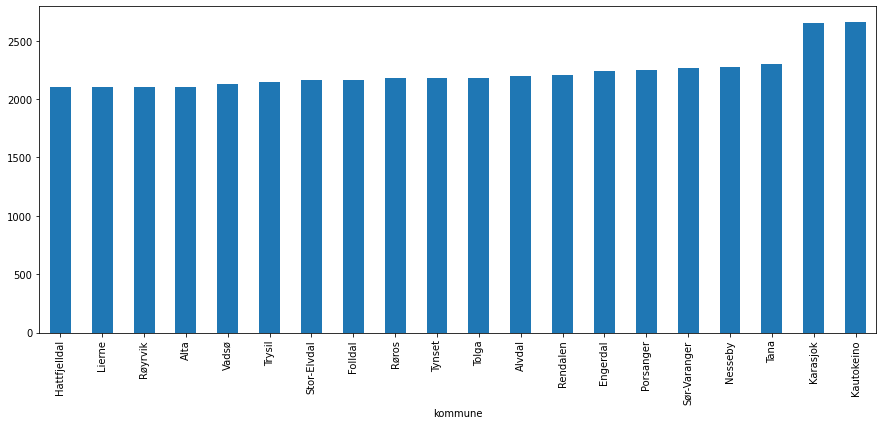

In [21]:
final_df['Winter'].sort_values().tail(20).plot.bar(figsize=(15,6))

###  get the coordinate of each town to match directly with the town in the announce

In [24]:
adress='karlsoiveien 15,tromsø'
urlbase='https://maps.googleapis.com/maps/api/geocode/json'
api_key=''
endpoint=f'{urlbase}?address={adress}&key={api_key}'
r=requests.get(endpoint)
bydel=r.json()['results'][0]['address_components'][2]['long_name']

IndexError: list index out of range

In [23]:
r.json()

{'results': [{'address_components': [{'long_name': '15',
     'short_name': '15',
     'types': ['street_number']},
    {'long_name': 'Karlsøyvegen',
     'short_name': 'Karlsøyvegen',
     'types': ['route']},
    {'long_name': 'Tromsø', 'short_name': 'Tromsø', 'types': ['postal_town']},
    {'long_name': 'Tromsø',
     'short_name': 'Tromsø',
     'types': ['administrative_area_level_2', 'political']},
    {'long_name': 'Troms og Finnmark',
     'short_name': 'Troms og Finnmark',
     'types': ['administrative_area_level_1', 'political']},
    {'long_name': 'Norway',
     'short_name': 'NO',
     'types': ['country', 'political']},
    {'long_name': '9015', 'short_name': '9015', 'types': ['postal_code']}],
   'formatted_address': 'Karlsøyvegen 15, 9015 Tromsø, Norway',
   'geometry': {'bounds': {'northeast': {'lat': 69.6725108, 'lng': 18.9252412},
     'southwest': {'lat': 69.672325, 'lng': 18.9247197}},
    'location': {'lat': 69.67240009999999, 'lng': 18.9249496},
    'location_typ